In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import dtale
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv(r'C:\Users\Praful\Downloads\project\PHARMAB.csv')

In [3]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,06-01-2022,1,0,55.406,59.260,0.000,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.000,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.000,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.000,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.000,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,7/15/2022,0,8,47.902,0.000,330.288,Form1,SEVOFLURANE 99.97%,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,5/22/2022,1,0,41.862,42.218,0.000,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,01-12-2022,3,0,60.026,142.752,0.000,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,8/24/2022,2,0,49.856,94.000,0.000,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,8/31/2022,1,0,258.860,319.800,0.000,Form1,ONDANSETRON 2MG/ML,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     29 non-null     object 
 1   Patient_ID      29 non-null     int64  
 2   Specialisation  29 non-null     object 
 3   Dept            29 non-null     object 
 4   Dateofbill      29 non-null     object 
 5   Quantity        29 non-null     int64  
 6   ReturnQuantity  29 non-null     int64  
 7   Final_Cost      29 non-null     float64
 8   Final_Sales     29 non-null     float64
 9   RtnMRP          29 non-null     float64
 10  Formulation     28 non-null     object 
 11  DrugName        29 non-null     object 
 12  SubCat          25 non-null     object 
 13  SubCat1         25 non-null     object 
dtypes: float64(3), int64(3), object(8)
memory usage: 3.3+ KB


In [5]:
data.describe()

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.201810e+10,2.172414,0.379310,149.029241,364.017517,18.697241
std,1.632504e+04,3.732760,1.521601,244.138689,800.429588,65.894332
min,1.201807e+10,0.000000,0.000000,40.340000,0.000000,0.000000
25%,1.201808e+10,1.000000,0.000000,47.146000,48.400000,0.000000
50%,1.201810e+10,1.000000,0.000000,49.956000,81.100000,0.000000
75%,1.201811e+10,2.000000,0.000000,73.364000,193.600000,0.000000
max,1.201812e+10,20.000000,8.000000,959.800000,4004.214000,330.288000


In [6]:
data = data.drop(["Typeofsales", "Patient_ID"], axis =1)

In [7]:
#duplicates observed. These can be completely removed.

unique = data["DrugName"].value_counts()
data1 = data.drop_duplicates()

duplicate1 = data1.duplicated()
sum(duplicate1)

0

In [8]:
#Checking for missing values

data1.isna().sum()

Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       1
DrugName          0
SubCat            4
SubCat1           4
dtype: int64

In [9]:
data1.dropna(inplace=True)
data1.isna().sum()

Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [10]:
data1.to_csv('preprocessed_data.csv', index=False)

In [11]:
#autoeda
d = dtale.show(data1)
d.open_browser()

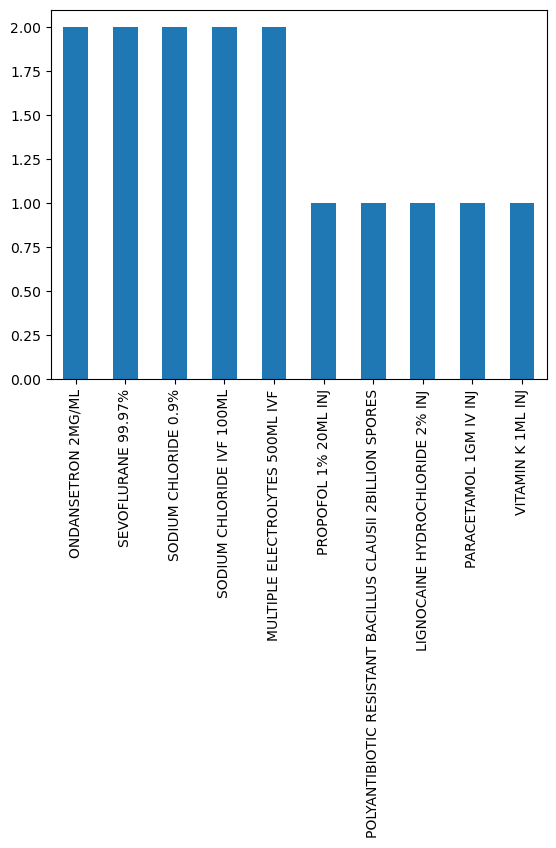

In [12]:
 #dropping Typeofsales and Patient_ID, since it is not required
# data1 = data1.drop(["Typeofsales", "Patient_ID"], axis =1)

data1['DrugName'].value_counts().head(10).plot(kind = 'bar')
data1 = data1[["Dateofbill","Quantity", "DrugName"]]
data1 = data1.set_index('Dateofbill')
data1.index = pd.to_datetime(data1.index)
grouped_data = data1.groupby('DrugName')

<Axes: xlabel='Dateofbill'>

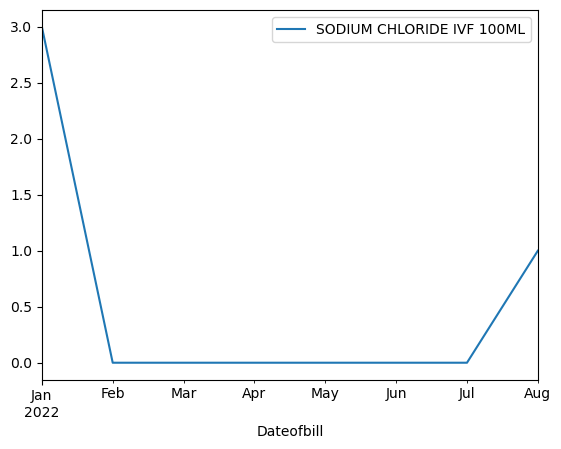

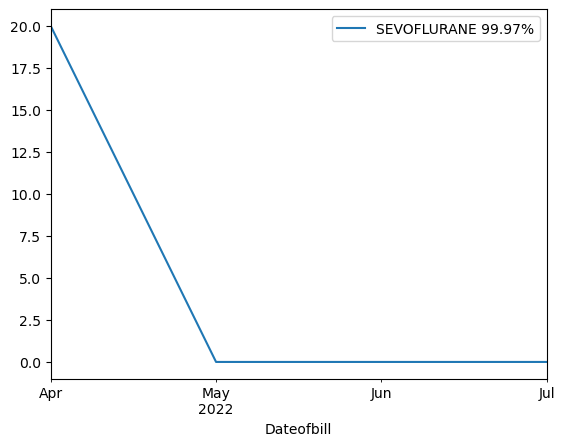

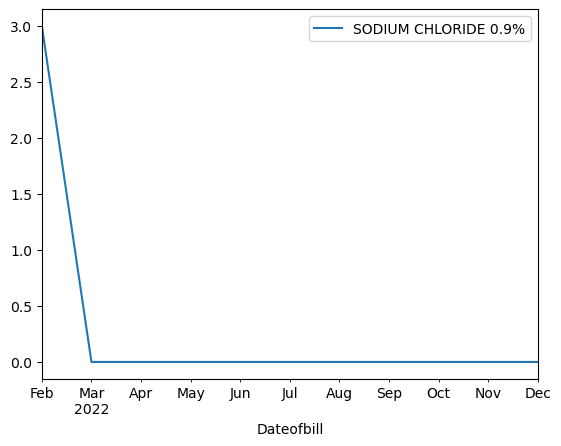

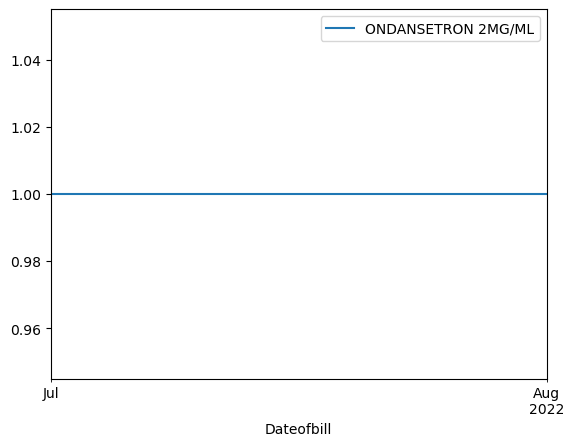

In [13]:
# Forecasting For Top 3 drugs

A = grouped_data.get_group('SODIUM CHLORIDE IVF 100ML')
A1 = grouped_data.get_group('SEVOFLURANE 99.97%')
A2 = grouped_data.get_group('SODIUM CHLORIDE 0.9%')
A3 = grouped_data.get_group('ONDANSETRON 2MG/ML')


A = A[["Quantity"]]
A.rename(columns = {"Quantity" : "SODIUM CHLORIDE IVF 100ML"}, inplace=True)
A = A.resample('M').sum()
A.plot()

A1 = A1[["Quantity"]]
A1.rename(columns = {"Quantity" : "SEVOFLURANE 99.97%"}, inplace=True)
A1 = A1.resample('M').sum()
A1.plot()

A2 = A2[["Quantity"]]
A2.rename(columns = {"Quantity" : "SODIUM CHLORIDE 0.9%"}, inplace=True)
A2 = A2.resample('M').sum()
A2.plot()

A3 = A3[["Quantity"]]
A3.rename(columns = {"Quantity" : "ONDANSETRON 2MG/ML"}, inplace=True)
A3 = A3.resample('M').sum()
A3.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

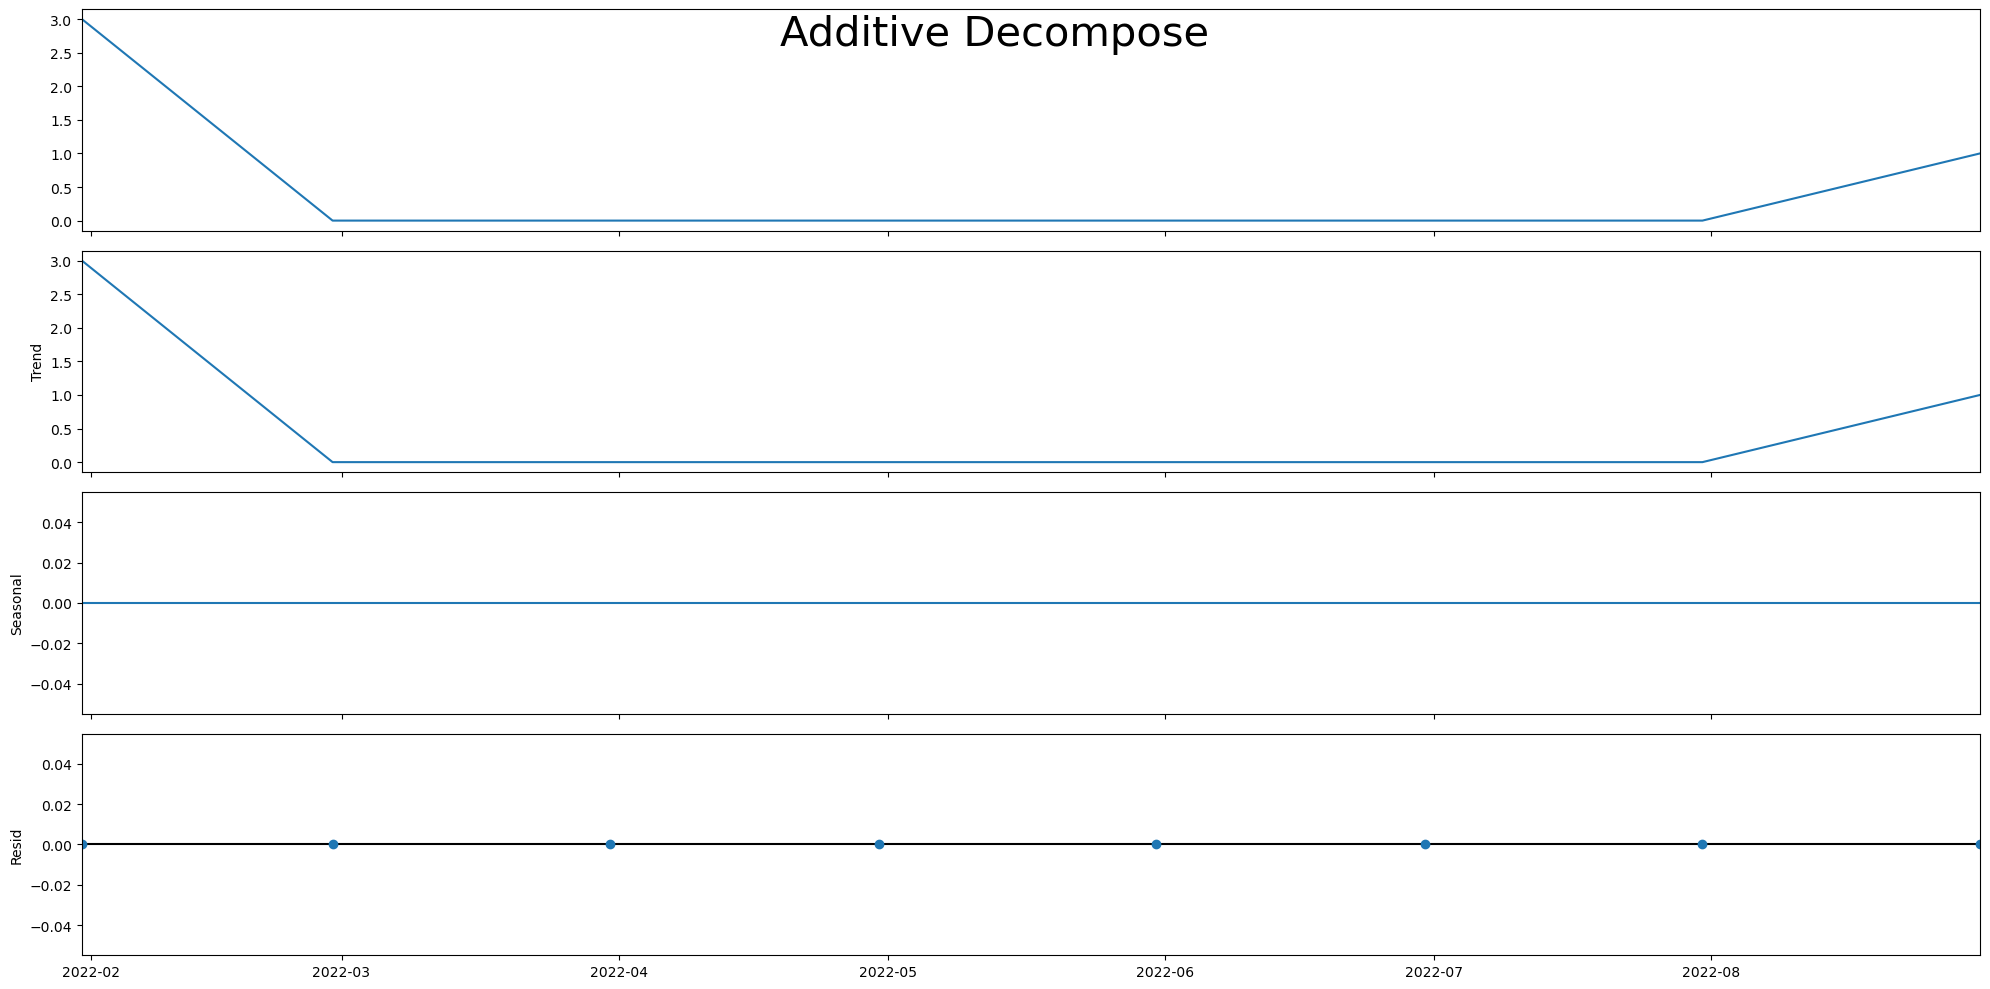

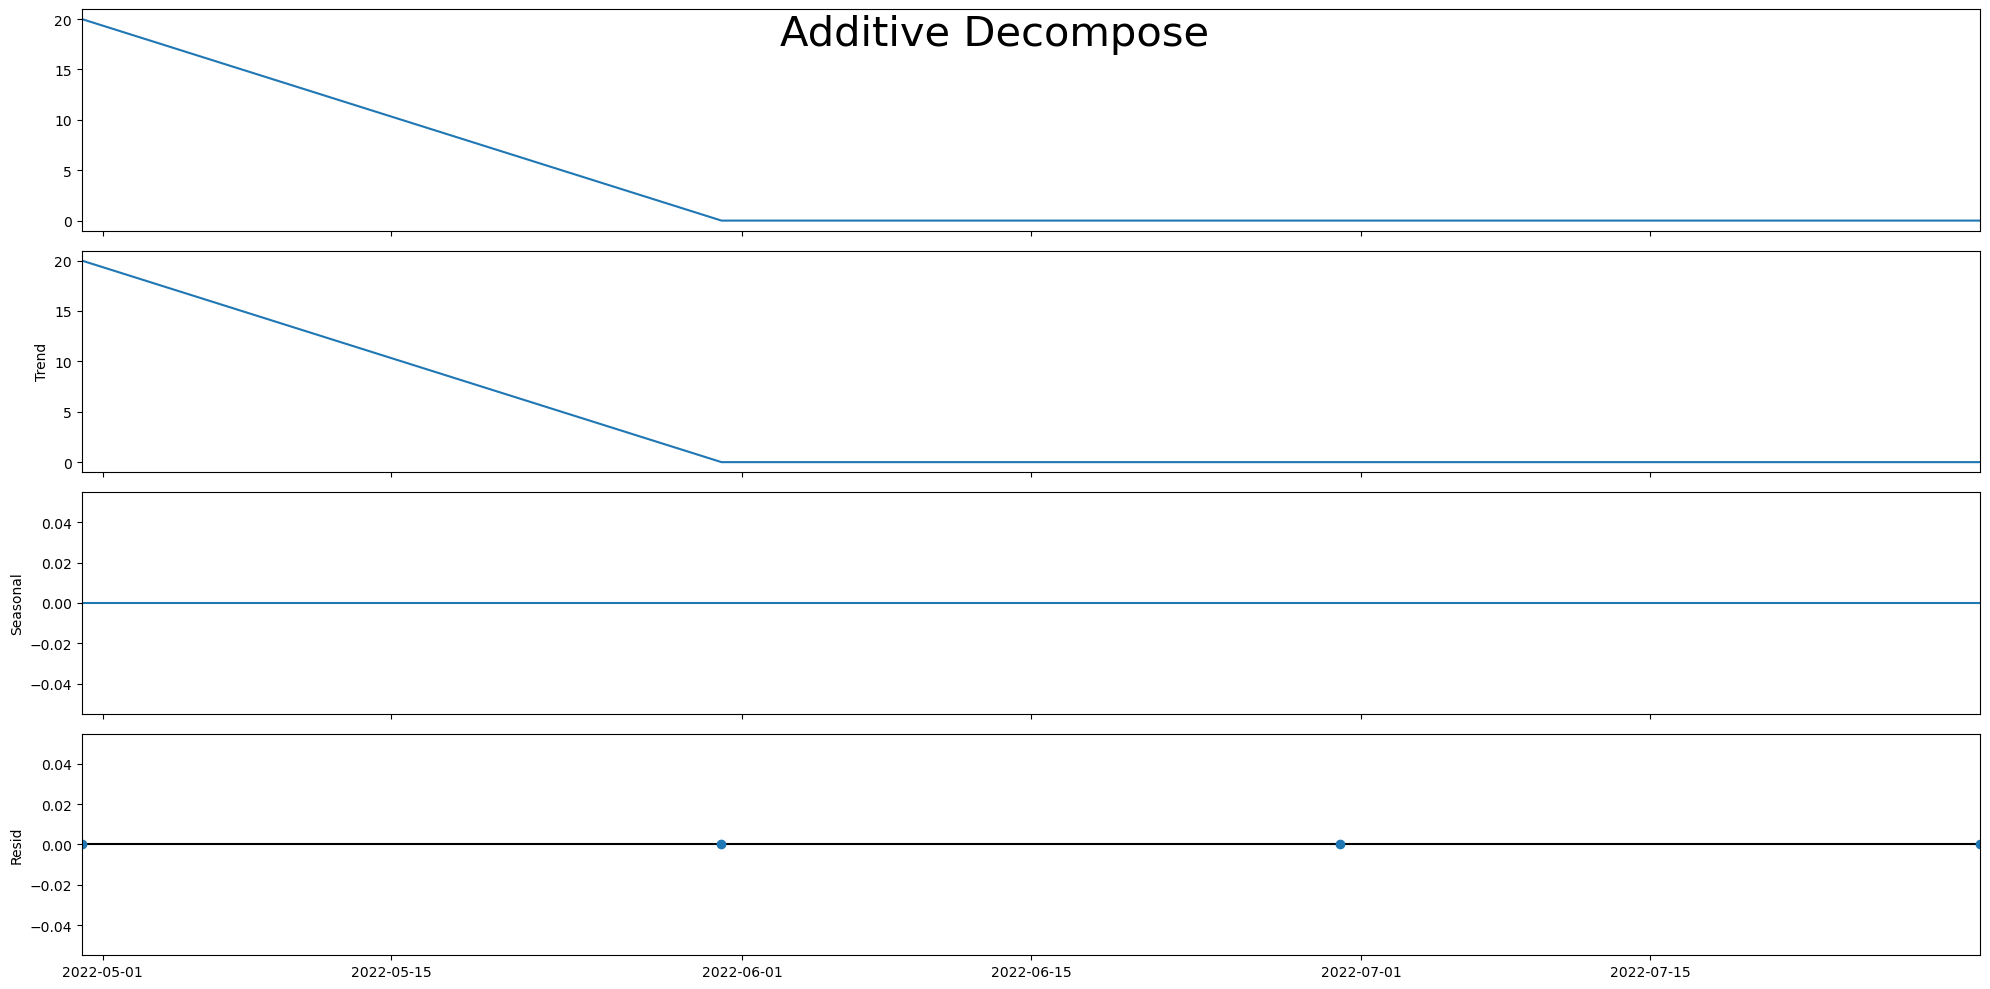

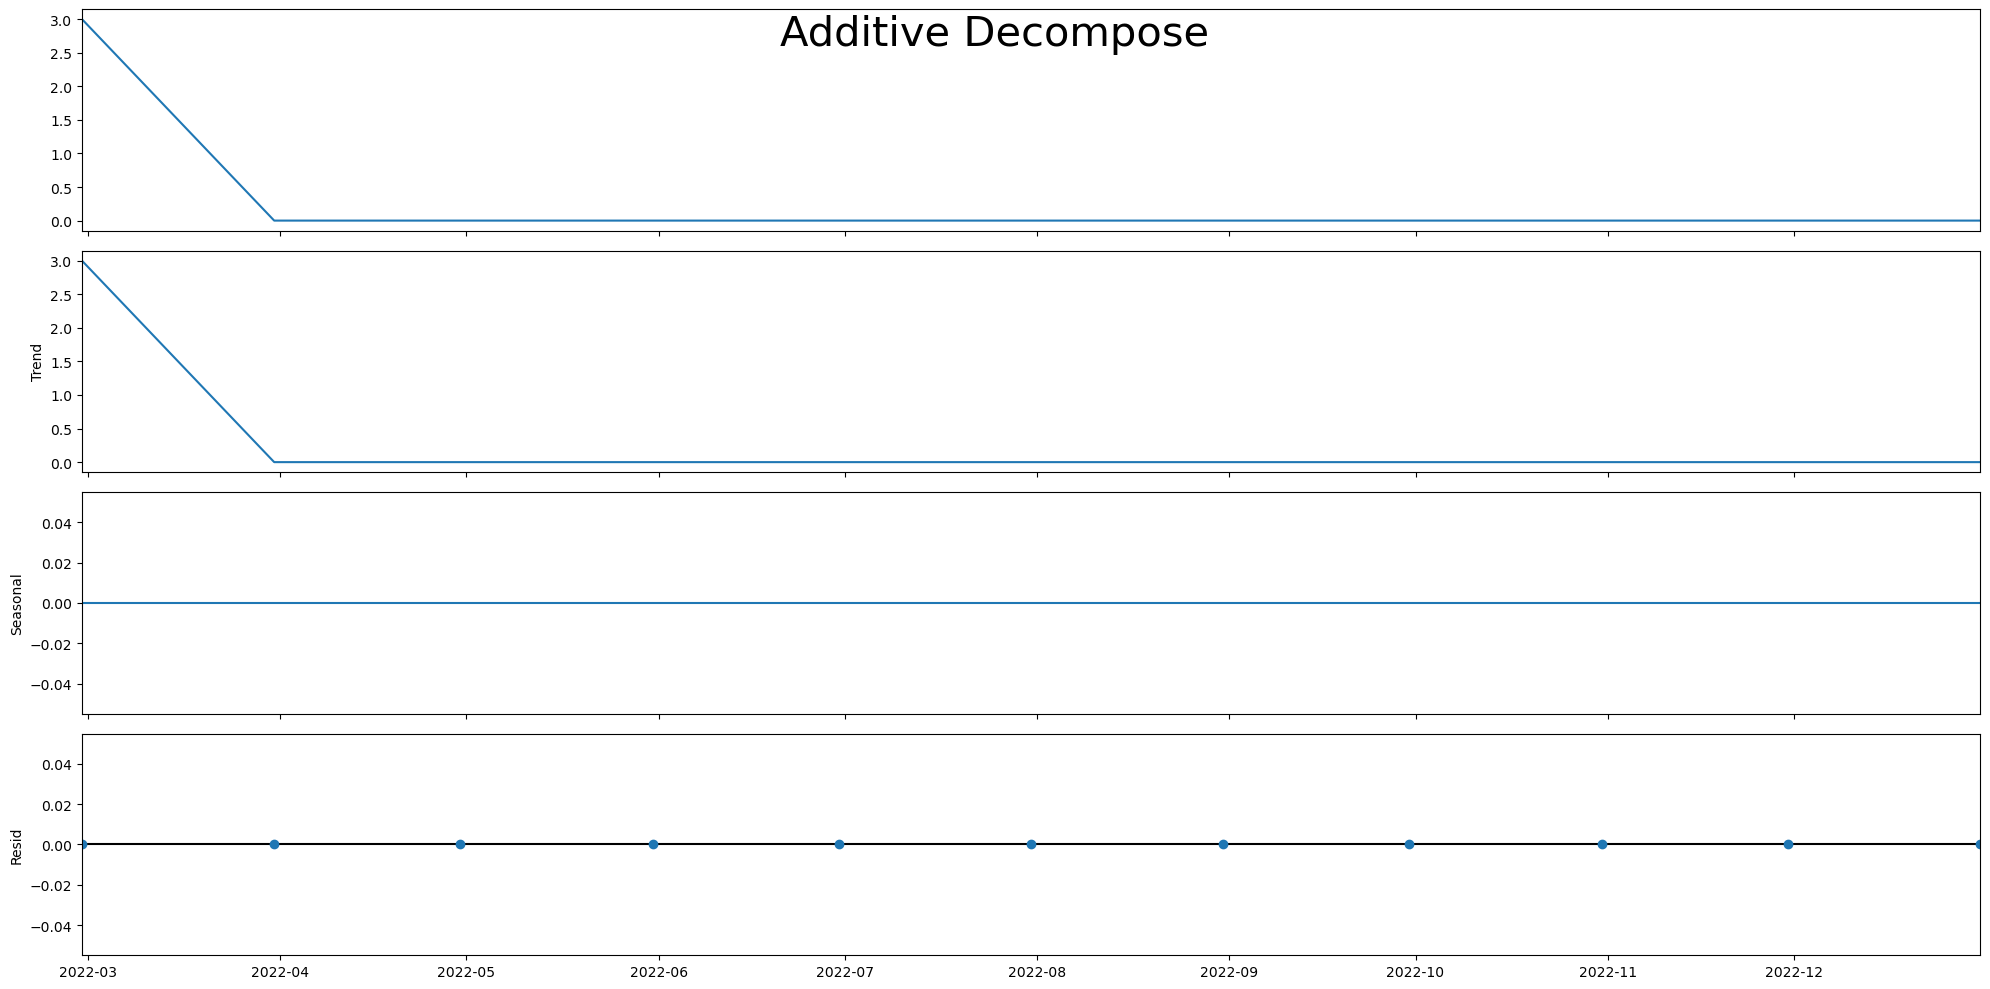

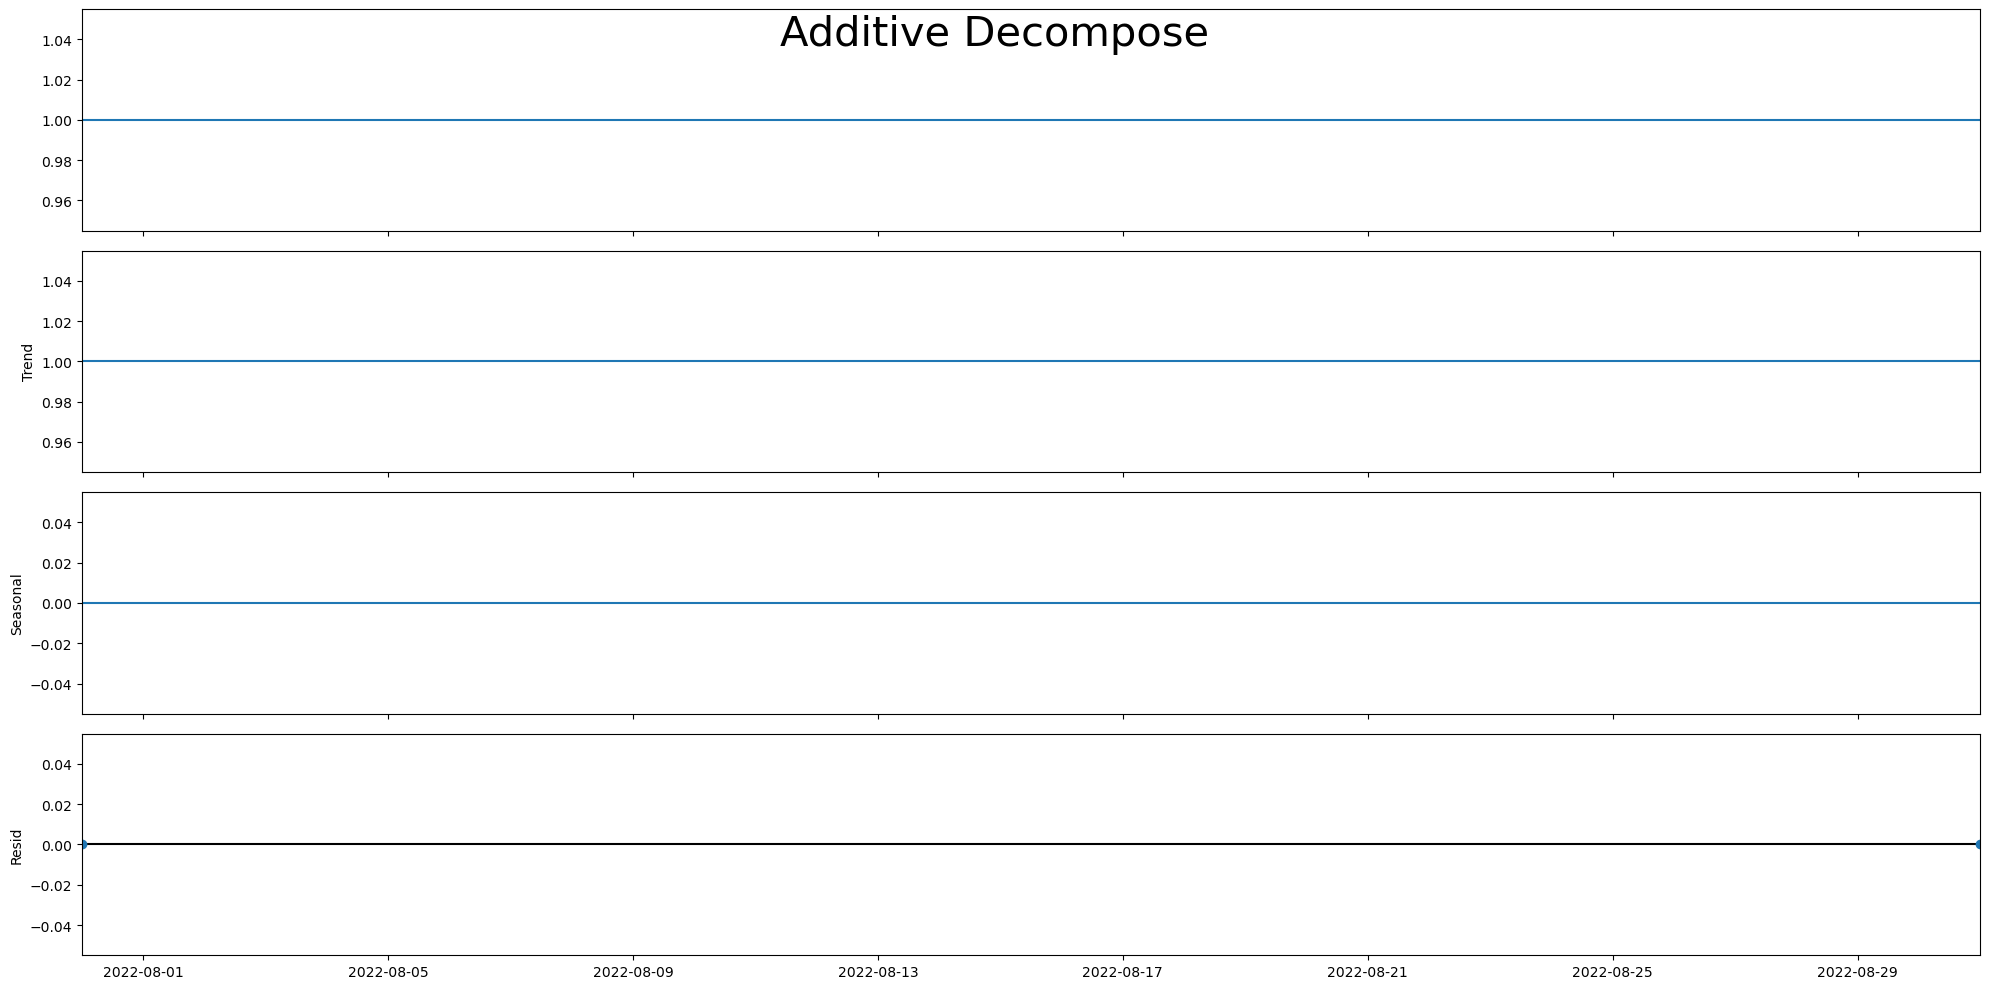

In [16]:
def decompose(df):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    # result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend = 'freq',  period=1)
    result_add = seasonal_decompose(df, model = 'additive', extrapolate_trend='freq',  period=1)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return  result_add

decompose(A)
decompose(A1)
decompose(A2)
decompose(A3)

In [17]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [18]:
# Import necessary libraries
from pmdarima import auto_arima
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Fit ARIMA models and print summaries for each time series

# For A
Am = auto_arima(A, suppress_warnings=True)
Am_model = Am.fit(A)  # Fit the ARIMA model with A as the time series data
print("Summary for A:")
print(Am_model.summary())

# For A1
Am1 = auto_arima(A1, suppress_warnings=True)
Am1_model = Am1.fit(A1)
print("Summary for A1:")
print(Am1_model.summary())

# For A2
Am2 = auto_arima(A2, suppress_warnings=True)
Am2_model = Am2.fit(A2)
print("Summary for A2:")
print(Am2_model.summary())

# For A3
Am3 = auto_arima(A3, suppress_warnings=True)
Am3_model = Am3.fit(A3)
print("Summary for A3:")
print(Am3_model.summary())

Summary for A:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                        SARIMAX   Log Likelihood                 -12.244
Date:                Wed, 27 Sep 2023   AIC                             26.488
Time:                        20:28:20   BIC                             26.568
Sample:                    01-31-2022   HQIC                            25.952
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2500      0.375      3.335      0.001       0.515       1.985
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.94
Prob(Q):                        

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
# Assuming you have loaded or created dataframes A, A1, A2, A3, A4 for each drug's time series data.
# Define and fit ARIMA model for 'SODIUM CHLORIDE IVF 100ML' (Drug1)
Drug1 = ARIMA(A, order=(1, 1, 8))
Drug1 = Drug1.fit()
print(Drug1.summary())

                                   SARIMAX Results                                   
Dep. Variable:     SODIUM CHLORIDE IVF 100ML   No. Observations:                    8
Model:                        ARIMA(1, 1, 8)   Log Likelihood                 -10.743
Date:                       Wed, 27 Sep 2023   AIC                             41.486
Time:                               20:28:27   BIC                             40.945
Sample:                           01-31-2022   HQIC                            34.800
                                - 08-31-2022                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       7.543e-05    2.3e+04   3.29e-09      1.000    -4.5e+04     4.5e+04
ma.L1      -9.127e-05   1.38e+04  -6.61e-09      1.000   -2.71e+04    2.71e

In [21]:
# Plot the predicted values for the first 12 time points
pred = Drug1.predict(start=1, end=8, typ='levels').rename('ARIMA predictions')
pred

2022-02-28    3.000000
2022-03-31    0.000019
2022-04-30   -0.000009
2022-05-31    0.000003
2022-06-30    0.000016
2022-07-31    0.000021
2022-08-31    1.162717
2022-09-30    1.000010
Freq: M, Name: ARIMA predictions, dtype: float64

In [22]:
# Calculate Mean Absolute Percentage Error for Drug1
mape1 = mean_absolute_percentage_error(A['SODIUM CHLORIDE IVF 100ML'], pred)
print(f"MAPE for Drug1: {mape1}")

MAPE for Drug1: 654590219086149.0


In [23]:
# SEVOFLURANE 99.97%
Drug2 = ARIMA(A1,order=(4, 1, 7))
Drug2 = Drug2.fit()
Drug2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     SEVOFLURANE 99.97%   No. Observations:                    4
Model:                 ARIMA(4, 1, 7)   Log Likelihood                 -11.596
Date:                Wed, 27 Sep 2023   AIC                             47.192
Time:                        20:28:32   BIC                             36.376
Sample:                    04-30-2022   HQIC                            25.449
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1304   2887.660  -4.51e-05      1.000   -5659.840    5659.579
ar.L2         -0.0383   2.28e+04  -1.68e-06      1.000   -4.48e+04    4.48e+04
ar.L3         -0.0385    3.7e+04  -1.04e-06      1.000   -7.25e+04    7.25e+04
ar.L4         -0.0493   1.05e+04   -4.7e-06      1.000   -2.06e+04    2.06e+04
ma.L1          0.0379   3255.078   1.16e-05      1.000   -6379.797    6379.873
ma.L2          0.0209   1.65e+04   1.26e-06      1.000   -3.24e+04    3.24e+04
ma.L3         -0.0845   3.54e+04  -2.39e-06      1.000   -6.95e+04    6.95e+04
ma.L4         -0.1391   9530.479  -1.46e-05      1.000   -1.87e+04    1.87e+04
ma.L5          0.2610   9650.363    2.7e-05      1.000   -1.89e+04    1.89e+04
ma.L6          0.2542   1.58e+04   1.61e-05      1.000   -3.09e+04    3.09e+04
ma.L7          0.3193   4076.792   7.83e-05      1.000   -7990.045    7990.684
sigma2       104.4350    301.931      0.346      0.729    -487.339     696.209
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.65   Prob(JB):                         0.77
Heteroskedasticity (H):                nan   Skew:                            -0.71
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.17e+21. Standard errors may be unstable.
"""

In [24]:
# Plot the predicted values for the first 12 time points
pred1 = Drug2.predict(start=4, end=7, typ='levels').rename('ARIMA predictions')
pred1

2022-08-31    3.231899
2022-09-30    6.970912
2022-10-31    2.668397
2022-11-30   -0.558922
Freq: M, Name: ARIMA predictions, dtype: float64

In [25]:
mape2 = mean_absolute_percentage_error(A1['SEVOFLURANE 99.97%'], pred1)
print(f"MAPE for Drug2: {mape2}")

MAPE for Drug2: 1.1482188087031816e+16


In [26]:
# SODIUM CHLORIDE 0.9%
Drug3 = ARIMA(A2,order=(2, 1, 12))
Drug3 = Drug3.fit()
Drug3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     SODIUM CHLORIDE 0.9%   No. Observations:                   11
Model:                  ARIMA(2, 1, 12)   Log Likelihood                 -13.663
Date:                  Wed, 27 Sep 2023   AIC                             57.325
Time:                          20:28:34   BIC                             61.864
Sample:                      02-28-2022   HQIC                            52.346
                           - 12-31-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -2.559e-06   5494.746  -4.66e-10      1.000   -1.08e+04    1.08e+04
ar.L2       7.325e-06      0.106   6.93e-05      1.000      -0.207       0.207
ma.L1      -6.694e-06   5494.759  -1.22e-09      1.000   -1.08e+04    1.08e+04
ma.L2      -7.325e-06      0.353  -2.07e-05      1.000      -0.692       0.692
ma.L3      -4.906e-06   2.05e+04  -2.39e-10      1.000   -4.02e+04    4.02e+04
ma.L4      -4.902e-06   2.05e+04  -2.39e-10      1.000   -4.02e+04    4.02e+04
ma.L5      -4.898e-06   2.05e+04  -2.38e-10      1.000   -4.03e+04    4.03e+04
ma.L6      -4.877e-06   2.06e+04  -2.36e-10      1.000   -4.04e+04    4.04e+04
ma.L7      -4.877e-06   2.06e+04  -2.36e-10      1.000   -4.04e+04    4.04e+04
ma.L8      -4.877e-06   2.06e+04  -2.36e-10      1.000   -4.04e+04    4.04e+04
ma.L9      -4.877e-06   2.06e+04  -2.36e-10      1.000   -4.04e+04    4.04e+04
ma.L10     -3.944e-06      0.322  -1.23e-05      1.000      -0.631       0.631
ma.L11     -3.944e-06      0.260  -1.52e-05      1.000      -0.510       0.510
ma.L12     -3.944e-06      0.278  -1.42e-05      1.000      -0.545       0.545
sigma2         0.9000      0.635      1.416      0.157      -0.345       2.145
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+27. Standard errors may be unstable.
"""

In [27]:
# Plot the predicted values for the first 12 time points
pred2 = Drug3.predict(start=2, end=12, typ='levels').rename('ARIMA predictions')
pred2

2022-04-30    2.775910e-05
2022-05-31   -3.578681e-11
2022-06-30    1.471798e-05
2022-07-31    1.470552e-05
2022-08-31    1.469289e-05
2022-09-30    1.462961e-05
2022-10-31    1.462993e-05
2022-11-30    1.463018e-05
2022-12-31    1.463043e-05
2023-01-31    1.183343e-05
2023-02-28    2.366671e-05
Freq: M, Name: ARIMA predictions, dtype: float64

In [28]:
mape3 = mean_absolute_percentage_error(A2['SODIUM CHLORIDE 0.9%'], pred2)
print(f"MAPE for Drug3: {mape3}")

MAPE for Drug3: 56555680827.824684


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
historical=pd.read_csv(r'C:\Users\Praful\Downloads\project\preprocessed_data.csv')

In [61]:
X = historical[['Specialisation', 'Dept', 'Dateofbill', 'Quantity', 'ReturnQuantity', 'Final_Cost', 'RtnMRP', 'Formulation', 'DrugName', 'SubCat', 'SubCat1']]
y = historical['Final_Sales']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
import evidently
evidently.__version__

'0.4.5'

In [64]:
from evidently.test_suite import TestSuite  # Note the space between 'import' and 'TestSuite'
from evidently.metrics import *

from evidently.tests import *
from evidently.report import Report
from evidently.metric_preset import TargetDriftPreset
from evidently import ColumnMapping

In [65]:
X_train['X']=y_train
X_train['y']=pred

In [66]:
X_test['X']=y_test
X_test['y']=pred1

In [67]:
target='X'

In [68]:
column_mapping = ColumnMapping()
column_mapping.X= target
column_mapping.y='predictions'

In [69]:
#data integrity tests
#dataset level test
data_integrity_dataset_tests = TestSuite(tests=[
    TestNumberOfColumns(),
    TestNumberOfRows(),
    TestNumberOfMissingValues(),
    TestShareOfMissingValues(),
    TestNumberOfColumnsWithMissingValues(),
    TestNumberOfRowsWithMissingValues(),
    TestShareOfColumnsWithMissingValues(),
    TestShareOfRowsWithMissingValues(),
    TestNumberOfDifferentMissingValues(),
    TestNumberOfConstantColumns(),
    TestNumberOfEmptyRows(),
    TestNumberOfEmptyColumns(),
    TestNumberOfDuplicatedRows(),
    TestNumberOfDuplicatedColumns(),
    TestColumnsType(),
    TestNumberOfDriftedColumns(),
])

In [70]:
preprocessed=pd.read_csv(r'C:\Users\Praful\Downloads\project\preprocessed_data.csv')

In [71]:
data_integrity_dataset_tests.run(reference_data=historical, current_data=preprocessed)
data_integrity_dataset_tests

In [72]:
data_integrity_dataset_tests.save_html('data_integrity_dataset_tests_report.html')

In [73]:
import os
os.getcwd()

'C:\\Users\\Praful\\Downloads\\project'

In [74]:
#columbleveltest
data_integrity_column_tests=TestSuite(tests=[
    TestColumnNumberOfMissingValues(column_name='Quantity'),
    TestColumnShareOfMissingValues(column_name='Quantity'),
    TestColumnNumberOfDifferentMissingValues(column_name='Quantity'),
    TestColumnAllConstantValues(column_name='Quantity'),
    TestColumnAllUniqueValues(column_name='Quantity'),
])

In [75]:
data_integrity_column_tests.run(reference_data=historical, current_data=preprocessed)

In [76]:
#save file
data_integrity_column_tests.save_html('data_integrity_column_tests_report.html')

In [77]:
#dataQualitytest
#dataset level test
data_quality_dataset_tests = TestSuite(tests=[
    TestConflictTarget(),
    TestConflictPrediction(),
    TestTargetPredictionCorrelation(),
    TestHighlyCorrelatedColumns(),
    TestTargetFeaturesCorrelations(),
    TestPredictionFeaturesCorrelations(),
    TestCorrelationChanges(),
])

In [78]:
data_quality_dataset_tests.run(reference_data=historical, current_data=preprocessed)

In [79]:
#save file
data_quality_dataset_tests.save_json('data_quality_dataset1_tests_report.json')

In [80]:
#evidently Metrics
# data drift
#dataset level metrics
data_drift_dataset_report=Report(metrics=[DataDriftTable(num_stattest='kl_div', cat_stattest='psi'),])

In [81]:
data_drift_dataset_report.run(reference_data=historical, current_data=preprocessed)
data_drift_dataset_report.save_html('data_drift_dataset_report.html')

In [82]:
#column level metrics
data_drift_column_report=Report(metrics=[ColumnDriftMetric('Quantity'), ColumnValuePlot('Quantity'),])

In [83]:
data_drift_column_report.run(reference_data=historical, current_data=preprocessed)
data_drift_column_report.save_html('data_drift_column_report.html')

2023-09-27 21:27:17,363 - INFO     - Executing shutdown due to inactivity...
2023-09-27 21:27:21,473 - INFO     - Executing shutdown...
2023-09-27 21:27:21,893 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
